**Visualizations for the single trial files**

Mainly just a view of the EEG signals for each user to compare to the averaged dataset. Visualizations done using MNE.

Mount Drive and switch directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/My \Drive/single_trial_files

In [ ]:
pip install mne

     |████████████████████████████████| 6.6MB 2.7MB/s 


Imports

In [ ]:
import numpy as np
import pandas as pd
import glob
import os
from os.path import splitext
import csv
import mne

**Get files**

In [ ]:
#get files of specified type in filepath
def get_files(filepath):
  files_array = np.array([])
  for file in glob.iglob(filepath):
    files_array = np.append(files_array, file)
    
  return files_array

In [ ]:
static_fear_files = get_files("*12_eeg.dat")
static_anger_files = get_files("*22_eeg.dat")
dyn_fear_files = get_files("*11_eeg.dat")
dyn_anger_files = get_files("*21_eeg.dat")

**Get channel names**

In [ ]:
#get channel names
ch_names = []
with open(static_fear_files[0]) as f:
  line = f.readline()
  #skip to channel names
  for x in range(0, 15):
    line = f.readline()
  line = ''.join(line.split(' '))
  ch_names = line.split('\t')
  #take off last 3 channel names (EEG and unnamed)
  ch_names = ch_names[:len(ch_names) - 3]

**Read files**

In [ ]:
#returns 2 numpy array of form (rows, cols) for a file
def read_file(filename):
  row_num = 0
  isAccepted = 0
  sample_row = 0

  #get size of file
  size = os.path.getsize(filename)

  #get number of lines in file
  with open(filename, "r+") as f:
    NUM_LINES = sum(1 for l in f)
    #truncate file to size
    f.truncate(size)

  with open(filename, "r") as f:
    #skip to accepted parameter
    for x in range (0, 11):
      line = f.readline()
    row_num += 11
    line = ''.join(line.split())
    #read num of accepted params
    accepts = int(line[10:12])
    #initialize sample
    sample = np.zeros(shape=((1101 * accepts),64))

    #skip to accept parameter
    for x in range(11, 23):
      line = f.readline()
    row_num += 12
    line = ''.join(line.split())
    #get number value that corresponds to if data is accepted or not
    isAccepted = int(line[8])
  
    #loop through file
    while line:
      #skip to data
      for x in range(0, 5):
        line = f.readline()
      row_num += 5
      #if accepted = 1, read data lines
      if isAccepted == 1:
        #read 1101 rows of data
        line_num = row_num
        for x in range(0, 1101):
          #turn line of data into numpy array
          line_array = np.fromstring(line.strip(), dtype=float, sep="\t")
          #delete non-EEG channels   
          line_array = np.delete(line_array, [64, 65])
          #print ("line #: ", line_num, " array: ", line_array) #debugging
          #add data to sample
          sample[sample_row] = line_array
          sample_row += 1
          #read next line
          line = f.readline()
          line_num+=1
      #else, skip to next accept parameter
      else:
        for x in range(0, 1101):
          line = f.readline()
      row_num += 1101
      #get next accept parameter (if not at end of file)
      if row_num < NUM_LINES:
        for x in range(0, 2):
          line = f.readline()
        row_num += 2
        line = ''.join(line.split())
        isAccepted = int(line[8])

  return sample

In [ ]:
#have dicts of form file: 2d numpy array of data
static_fear_dict = dict()
static_anger_dict = dict()
dyn_fear_dict = dict()
dyn_anger_dict = dict()

#read files
for file in static_fear_files:
  static_fear_dict[file] = read_file(file)

for file in dyn_fear_files:
  dyn_fear_dict[file] = read_file(file)

for file in static_anger_files:
  static_anger_dict[file] = read_file(file)

for file in dyn_anger_files:
  dyn_anger_dict[file] = read_file(file)

**Create info dictionary to be used for MNE objects**

In [ ]:
#channel types
ch_types = ['eeg' for x in range(64)]
#ch_types.extend(['eog', 'eog'])

#create info dictionary (our dataset has freq of 1000 Hertz)
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=1000)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: [FP1], [FPZ], [FP2], [AF3], [AF4], [F7], [F5], [F3], [F1], [FZ], ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


**Compare Evokes**

printing:  FM01
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


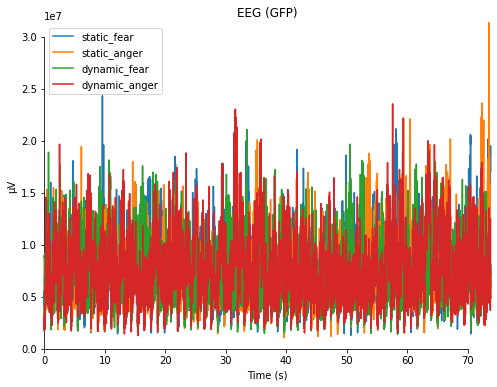

printing:  FM03
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


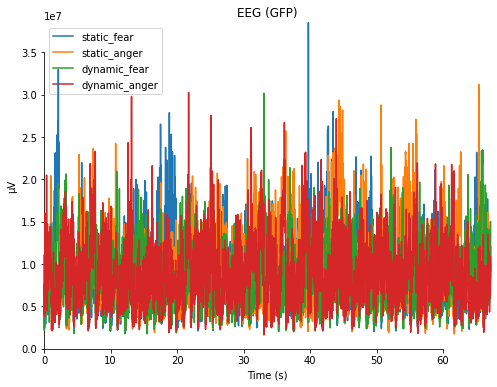

printing:  FM05
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


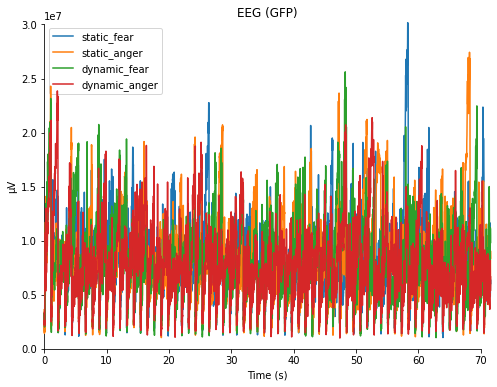

printing:  FM04
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


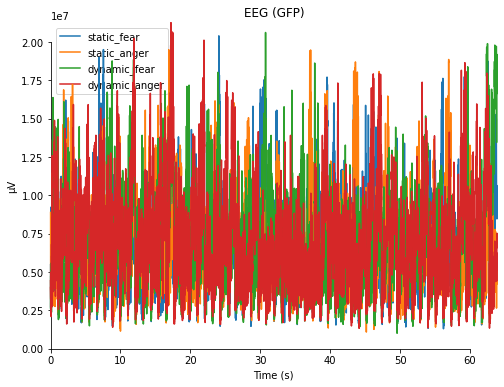

printing:  FM06
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


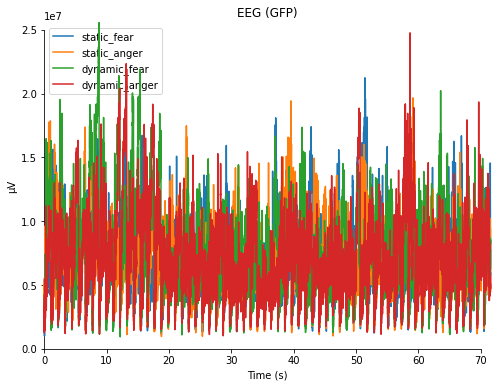

printing:  FM08
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


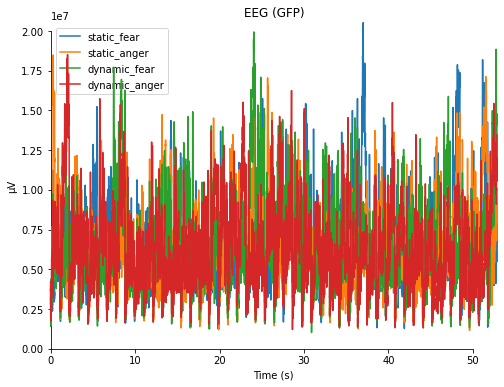

printing:  FM09
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


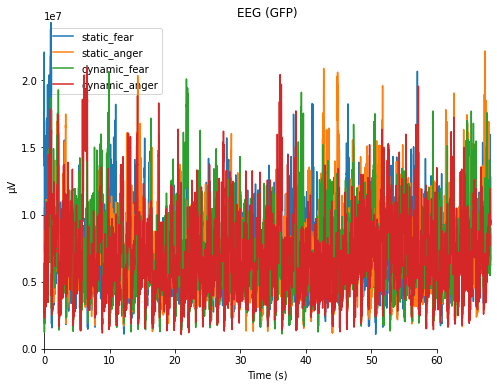

printing:  FM07
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


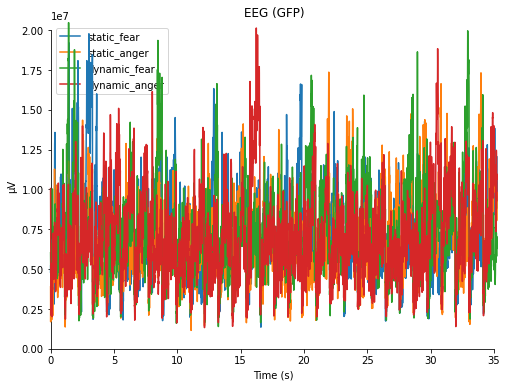

printing:  FM10
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


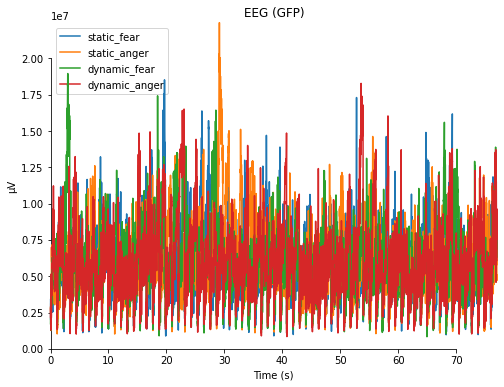

printing:  FM11
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


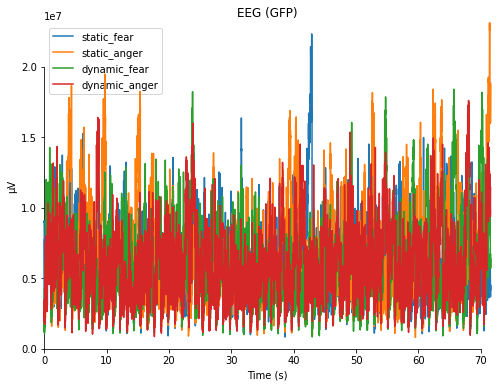

printing:  FM13
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


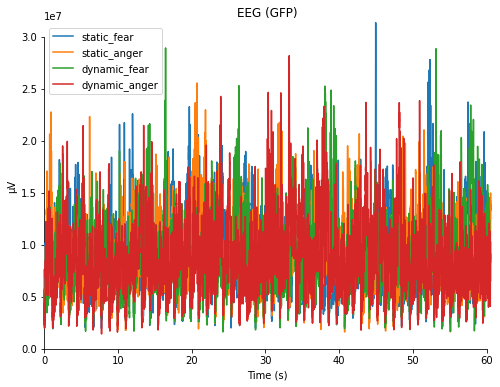

printing:  FM14
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


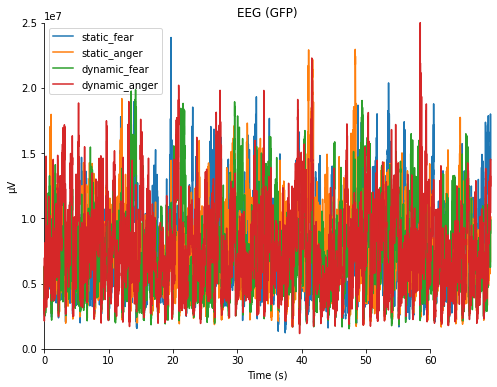

printing:  FM15
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


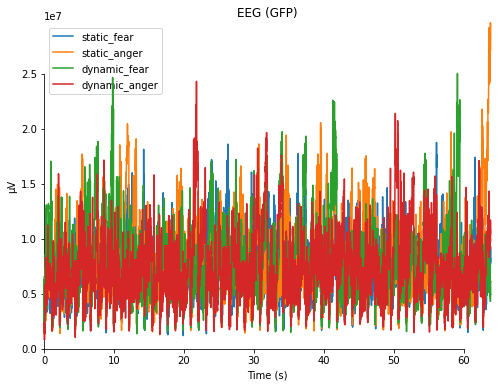

printing:  FM16
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


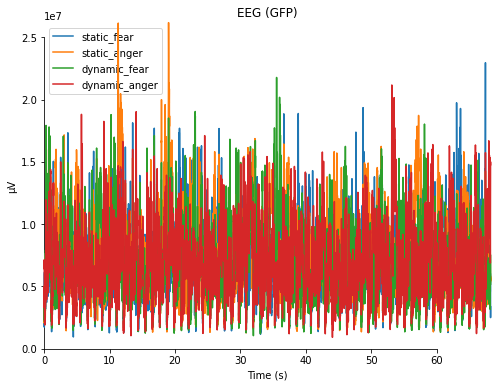

printing:  FM17
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


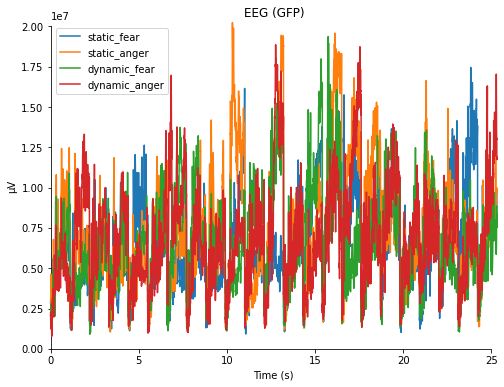

printing:  FM18
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


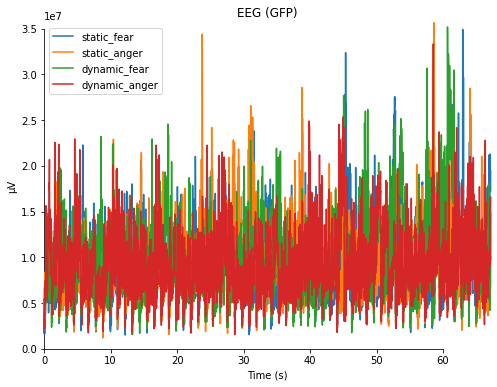

printing:  FM19
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


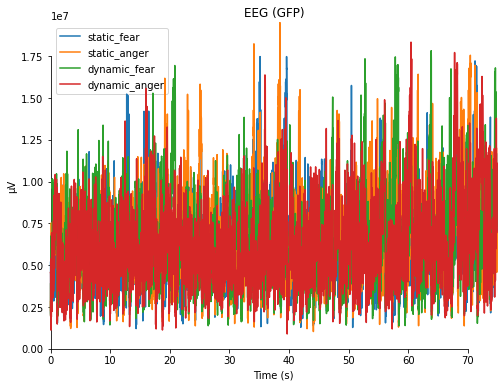

printing:  FM20
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


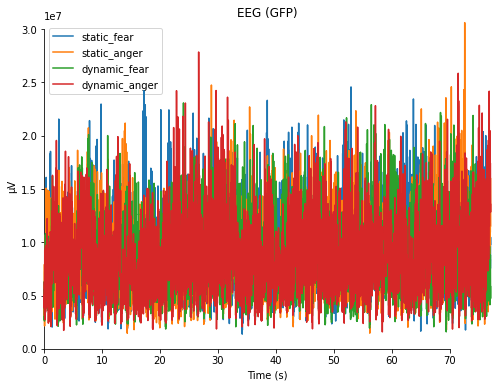

printing:  FM21
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


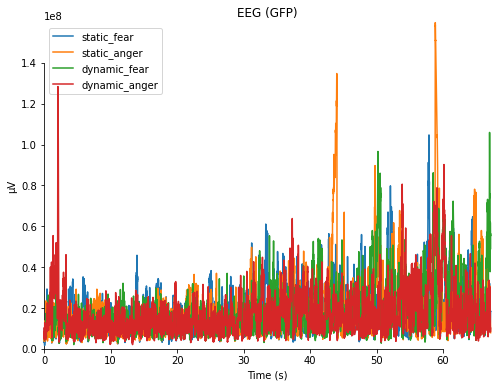

printing:  FM22
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


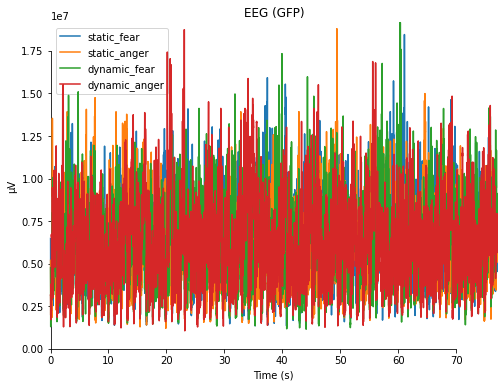

printing:  FM23
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


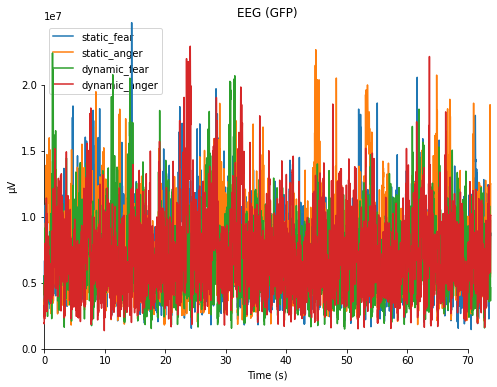

printing:  FM24
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


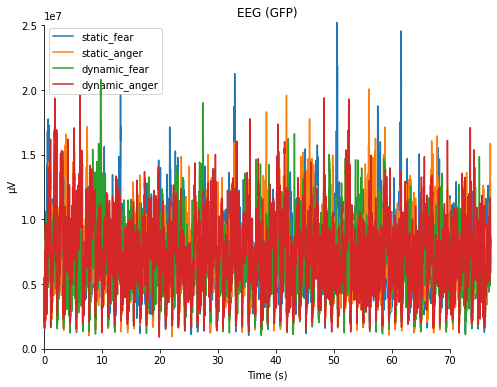

In [ ]:
#compare four classes
for key, value in static_fear_dict.items():
  evks = dict()
  person_no = key[0:4]
  static_anger = person_no + '_22_eeg.dat'
  dyn_fear = person_no + key[4:6] + '1_eeg.dat'
  dyn_anger = person_no + '_21_eeg.dat'

  #skip iteration if key equals deleted file
  if dyn_fear == 'FM12_11_eeg.dat':
    continue
  
  #truncate matrices to have same num of rows
  row_lengths = []
  stat_dict_anger = static_anger_dict[static_anger]
  dyn_dict_fear = dyn_fear_dict[dyn_fear]
  dyn_dict_anger = dyn_anger_dict[dyn_anger]

  row_lengths.append(len(stat_dict_anger))
  row_lengths.append(len(value))
  row_lengths.append(len(dyn_dict_fear))
  row_lengths.append(len(dyn_dict_anger))

  minRowLen = min(row_lengths)

  value = value[0:minRowLen]
  stat_dict_anger = stat_dict_anger[0:minRowLen]
  dyn_dict_fear = dyn_dict_fear[0:minRowLen]
  dyn_dict_anger = dyn_dict_anger[0:minRowLen]

  #add values to dict
  evks['static_fear'] = mne.EvokedArray(value.T, info=info)
  evks['static_anger'] = mne.EvokedArray(stat_dict_anger.T, info=info)
  evks['dynamic_fear'] = mne.EvokedArray(dyn_dict_fear.T, info=info)
  evks['dynamic_anger'] = mne.EvokedArray(dyn_dict_anger.T, info=info)
  print ("printing: ", person_no)
  fig = mne.viz.plot_compare_evokeds(evks, picks='eeg')

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


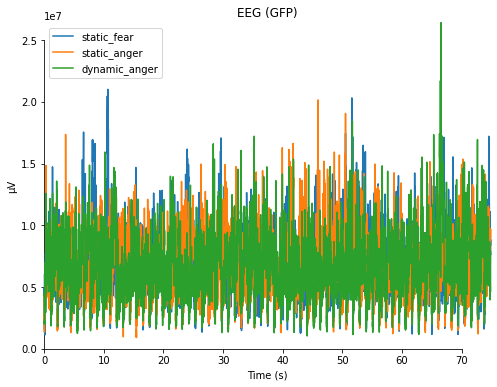

In [ ]:
#compare evokes for the 12th patient which was skipped because of the deleted file
static_anger = static_anger_dict['FM12_22_eeg.dat']
static_fear = static_fear_dict['FM12_12_eeg.dat']
dyn_anger = dyn_anger_dict['FM12_21_eeg.dat']

rows = []
rows.append(len(static_anger))
rows.append(len(dyn_anger))
rows.append(len(static_fear))

minRowLen = min(rows)

static_anger = static_anger[0:minRowLen]  
static_fear = static_fear[0:minRowLen]
dyn_anger = dyn_anger[0:minRowLen]

evks = dict()
evks['static_fear'] = mne.EvokedArray(static_fear.T, info=info)
evks['static_anger'] = mne.EvokedArray(static_anger.T, info=info)
evks['dynamic_anger'] = mne.EvokedArray(dyn_anger.T, info=info)

fig = mne.viz.plot_compare_evokeds(evks, picks='eeg')